# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [23]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [24]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [18]:
y, X = patsy.dmatrices('tip ~ sex + smoker + size + time + net_bill + 1', tips)
X

DesignMatrix with shape (244, 6)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  size  net_bill
          1              1             1               1     2     15.98
          1              0             1               1     3      8.68
          1              0             1               1     3     17.51
          1              0             1               1     2     20.37
          1              1             1               1     4     20.98
          1              0             1               1     4     20.58
          1              0             1               1     2      6.77
          1              0             1               1     4     23.76
          1              0             1               1     2     13.08
          1              0             1               1     2     11.55
          1              0             1               1     2      8.56
          1              1             1               1     4     30.26
          1       

In [19]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     27.86
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           3.47e-22
Time:                        08:28:25   Log-Likelihood:                -368.73
No. Observations:                 244   AIC:                             749.5
Df Residuals:                     238   BIC:                             770.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8121      0.260      3.122      0.002       0.300       1.325
sex[T.Female]     -0.0041      0.153     -0.027      0.979      -0.305       0.297
smoker[T.No]       0.0153      0.151      0.101      0.920      -0.283       0.313
time[T.Dinner]     0.0544      0.164      0.331      0.741      -0.269       0.378
size               0.3381      0.094      3.581      0.000       0.152       0.524
net_bill           0.0757      0.011      6.705      0.000       0.053       0.098
==============================================================================
Omnibus:                       43.172   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.881
Skew:                           0.881   Prob(JB):                     8.26e-20
Kurtosis:                       5.354   Cond. No.                         75.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
y1, X1 = patsy.dmatrices('tip ~ size + net_bill + 1', tips)
X1

DesignMatrix with shape (244, 3)
  Intercept  size  net_bill
          1     2     15.98
          1     3      8.68
          1     3     17.51
          1     2     20.37
          1     4     20.98
          1     4     20.58
          1     2      6.77
          1     4     23.76
          1     2     13.08
          1     2     11.55
          1     2      8.56
          1     4     30.26
          1     2     13.85
          1     4     15.43
          1     2     11.81
          1     2     17.66
          1     3      8.66
          1     3     12.58
          1     3     13.47
          1     3     17.30
          1     2     13.84
          1     2     17.54
          1     2     13.54
          1     4     31.84
          1     2     16.64
          1     4     15.47
          1     2     11.37
          1     2     10.69
          1     2     17.40
          1     2     16.65
  [214 rows omitted]
  Terms:
    'Intercept' (column 0)
    'size' (column 1)
    'net_bill' (colu

In [21]:
modelo_corr = sm.OLS(y1,X1).fit()

modelo_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     70.44
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           8.15e-25
Time:                        08:28:33   Log-Likelihood:                -368.79
No. Observations:                 244   AIC:                             743.6
Df Residuals:                     241   BIC:                             754.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8479      0.209      4.057      0.000       0.436       1.260
size           0.3402      0.091      3.727      0.000       0.160       0.520
net_bill       0.0760      0.011      7.032      0.000       0.055       0.097
==============================================================================
Omnibus:                       43.472   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.448
Skew:                           0.887   Prob(JB):                     6.22e-20
Kurtosis:                       5.356   Cond. No.                         57.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

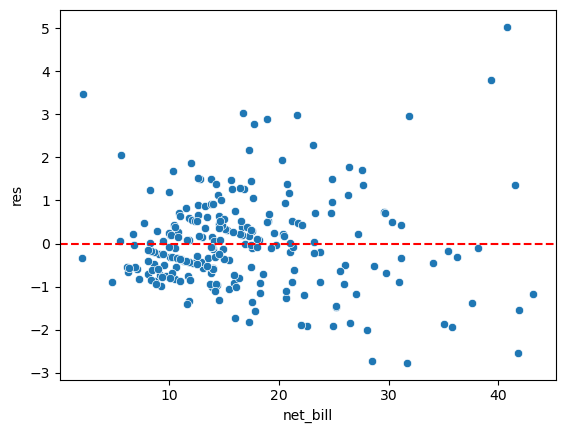

In [26]:
tips['res'] = modelo_corr.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [27]:
y2, X2 = patsy.dmatrices('tip ~ size + np.log(net_bill) + 1', tips)

modelo_corr = sm.OLS(y2,X2).fit()

modelo_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     63.02
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           9.66e-23
Time:                        08:59:46   Log-Likelihood:                -373.63
No. Observations:                 244   AIC:                             753.3
Df Residuals:                     241   BIC:                             763.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.0708      0.418     -2.562      0.011      -1.894      -0.247
size                 0.3903      0.092      4.239      0.000       0.209       0.572
np.log(net_bill)     1.1308      0.183      6.178      0.000       0.770       1.491
==============================================================================
Omnibus:                       74.760   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.807
Skew:                           1.295   Prob(JB):                     6.24e-52
Kurtosis:                       7.060   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
y3, X3 = patsy.dmatrices('tip ~ size + np.power(net_bill,2) + 1', tips)

modelo_corr = sm.OLS(y3,X3).fit()

modelo_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     66.10
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.30e-23
Time:                        09:04:43   Log-Likelihood:                -371.60
No. Observations:                 244   AIC:                             749.2
Df Residuals:                     241   BIC:                             759.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.4309      0.210      6.810      0.000       1.017       1.845
size                      0.3987      0.089      4.469      0.000       0.223       0.574
np.power(net_bill, 2)     0.0016      0.000      6.546      0.000       0.001       0.002
==============================================================================
Omnibus:                       33.294   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.075
Skew:                           0.778   Prob(JB):                     1.81e-12
Kurtosis:                       4.701   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
y4, X4 = patsy.dmatrices('tip ~ size + np.power(net_bill,3) + 1', tips)

modelo_corr = sm.OLS(y4,X4).fit()

modelo_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.58
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           4.86e-22
Time:                        09:05:21   Log-Likelihood:                -375.26
No. Observations:                 244   AIC:                             756.5
Df Residuals:                     241   BIC:                             767.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.4995      0.217      6.915      0.000       1.072       1.927
size                      0.4671      0.087      5.364      0.000       0.296       0.639
np.power(net_bill, 3)   3.49e-05   5.95e-06      5.869      0.000    2.32e-05    4.66e-05
==============================================================================
Omnibus:                       32.005   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.195
Skew:                           0.786   Prob(JB):                     3.42e-11
Kurtosis:                       4.506   Cond. No.                     5.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Comentário

Testei vários modelos, o maior $R^2$ foi o ajuste linear (polinômio de grau 1).

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [31]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + size + time + net_bill + 1', tips)
X

DesignMatrix with shape (244, 6)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  size  net_bill
          1              1             1               1     2     15.98
          1              0             1               1     3      8.68
          1              0             1               1     3     17.51
          1              0             1               1     2     20.37
          1              1             1               1     4     20.98
          1              0             1               1     4     20.58
          1              0             1               1     2      6.77
          1              0             1               1     4     23.76
          1              0             1               1     2     13.08
          1              0             1               1     2     11.55
          1              0             1               1     2      8.56
          1              1             1               1     4     30.26
          1       

In [32]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     6.512
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.07e-05
Time:                        09:13:46   Log-Likelihood:                 111.97
No. Observations:                 244   AIC:                            -211.9
Df Residuals:                     238   BIC:                            -190.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2929      0.036      8.074      0.000       0.221       0.364
sex[T.Female]     -0.0069      0.021     -0.325      0.746      -0.049       0.035
smoker[T.No]      -0.0444      0.021     -2.103      0.037      -0.086      -0.003
time[T.Dinner]     0.0218      0.023      0.954      0.341      -0.023       0.067
size               0.0250      0.013      1.902      0.058      -0.001       0.051
net_bill          -0.0084      0.002     -5.336      0.000      -0.011      -0.005
==============================================================================
Omnibus:                      461.365   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216987.945
Skew:                          10.760   Prob(JB):                         0.00
Kurtosis:                     147.499   Cond. No.                         75.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
y5, X5 = patsy.dmatrices('tip_pct ~ smoker + size + net_bill + 1', tips)

modelo_cor = sm.OLS(y5,X5).fit()

modelo_cor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     10.50
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.63e-06
Time:                        09:18:58   Log-Likelihood:                 111.37
No. Observations:                 244   AIC:                            -214.7
Df Residuals:                     240   BIC:                            -200.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3018      0.031      9.684      0.000       0.240       0.363
smoker[T.No]    -0.0451      0.021     -2.143      0.033      -0.087      -0.004
size             0.0251      0.013      1.912      0.057      -0.001       0.051
net_bill        -0.0081      0.002     -5.245      0.000      -0.011      -0.005
==============================================================================
Omnibus:                      463.859   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           222882.589
Skew:                          10.876   Prob(JB):                         0.00
Kurtosis:                     149.457   Cond. No.                         62.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

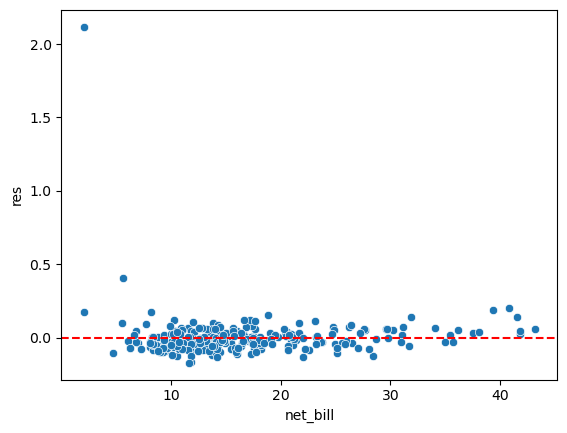

In [37]:
tips['res'] = modelo_cor.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [38]:
y6, X6 = patsy.dmatrices('tip ~ size + np.log(net_bill) + 1', tips)

modelo_corr = sm.OLS(y6,X6).fit()

modelo_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     63.02
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           9.66e-23
Time:                        09:23:20   Log-Likelihood:                -373.63
No. Observations:                 244   AIC:                             753.3
Df Residuals:                     241   BIC:                             763.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.0708      0.418     -2.562      0.011      -1.894      -0.247
size                 0.3903      0.092      4.239      0.000       0.209       0.572
np.log(net_bill)     1.1308      0.183      6.178      0.000       0.770       1.491
==============================================================================
Omnibus:                       74.760   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.807
Skew:                           1.295   Prob(JB):                     6.24e-52
Kurtosis:                       7.060   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
y7, X7 = patsy.dmatrices('tip ~ size + np.power(net_bill,2) + 1', tips)

modelo_corr = sm.OLS(y7,X7).fit()

modelo_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     66.10
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.30e-23
Time:                        09:24:10   Log-Likelihood:                -371.60
No. Observations:                 244   AIC:                             749.2
Df Residuals:                     241   BIC:                             759.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.4309      0.210      6.810      0.000       1.017       1.845
size                      0.3987      0.089      4.469      0.000       0.223       0.574
np.power(net_bill, 2)     0.0016      0.000      6.546      0.000       0.001       0.002
==============================================================================
Omnibus:                       33.294   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.075
Skew:                           0.778   Prob(JB):                     1.81e-12
Kurtosis:                       4.701   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [42]:
renda_prev = pd.read_csv('/Users/joicealves/Downloads/previsao_de_renda.csv')

renda_prev.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [50]:
renda_prev['data_ref'] = pd.to_datetime(renda_prev['data_ref'])

In [56]:
#são várias do tipo objeto, então vou separar um dataframe com os dummies para não ficar tão poluído

renda_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15000 non-null  int64         
 1   data_ref               15000 non-null  datetime64[ns]
 2   index                  15000 non-null  int64         
 3   sexo                   15000 non-null  object        
 4   posse_de_veiculo       15000 non-null  bool          
 5   posse_de_imovel        15000 non-null  bool          
 6   qtd_filhos             15000 non-null  int64         
 7   tipo_renda             15000 non-null  object        
 8   educacao               15000 non-null  object        
 9   estado_civil           15000 non-null  object        
 10  tipo_residencia        15000 non-null  object        
 11  idade                  15000 non-null  int64         
 12  tempo_emprego          12466 non-null  float64       
 13  q

In [113]:
renda_prev.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda', 'res', 'resi'],
      dtype='object')

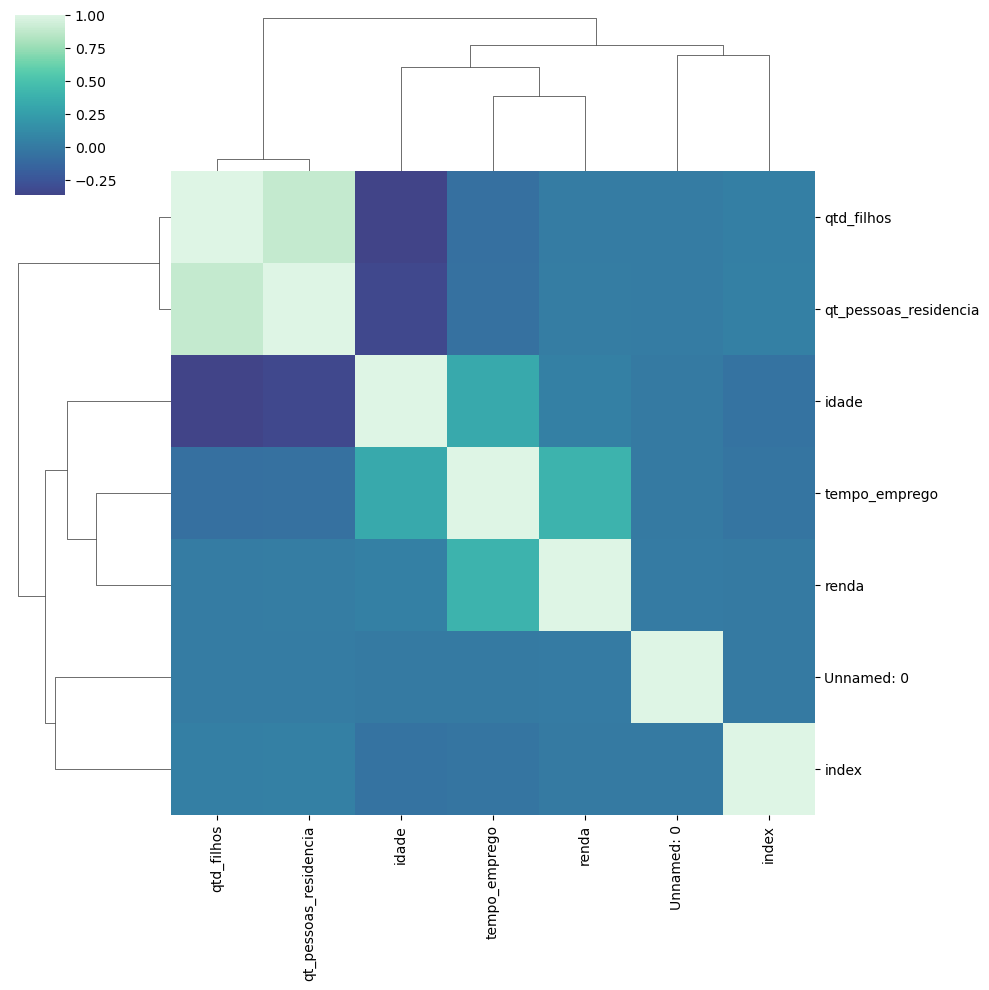

In [55]:
#dentre as variáveis numéricas, o tempo de emprego é a mais relevante
#parece ser a única, na verdade

renda_numerica = renda_prev.select_dtypes(include=['number'])

sns.clustermap(renda_numerica.corr(), figsize=(10, 10), center=0, cmap="mako")

In [57]:
renda_prev1 = pd.get_dummies(renda_prev, drop_first = True)

renda_prev1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     15000 non-null  int64         
 1   data_ref                       15000 non-null  datetime64[ns]
 2   index                          15000 non-null  int64         
 3   posse_de_veiculo               15000 non-null  bool          
 4   posse_de_imovel                15000 non-null  bool          
 5   qtd_filhos                     15000 non-null  int64         
 6   idade                          15000 non-null  int64         
 7   tempo_emprego                  12466 non-null  float64       
 8   qt_pessoas_residencia          15000 non-null  float64       
 9   mau                            15000 non-null  bool          
 10  renda                          15000 non-null  float64       
 11  sexo_M         

In [104]:
renda_prev1['tipo_renda_Servidor_publico'] = renda_prev1['tipo_renda_Servidor público'] 

renda_prev1['tipo_renda_Servidor_publico']

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996     True
14997    False
14998     True
14999    False
Name: tipo_renda_Servidor_publico, Length: 15000, dtype: bool

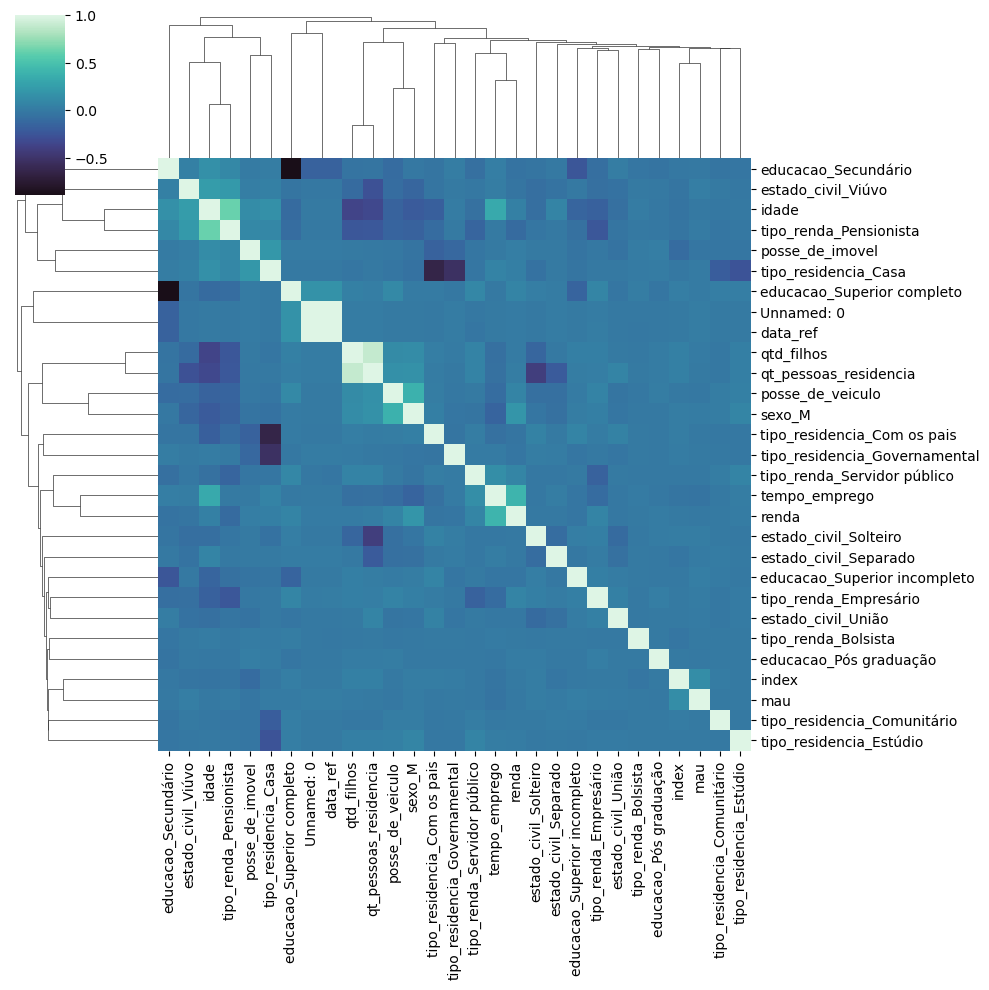

In [58]:
#não mudou muito, continua sendo tempo de emprego

sns.clustermap(renda_prev1.corr(), figsize=(10, 10), center=0, cmap="mako")

In [47]:
y, X = patsy.dmatrices('renda ~ tempo_emprego + 1', renda_prev)

modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Mon, 03 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:28:21   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
reg.fittedvalues

0        3667.021680
1        2897.704709
2        4939.383452
3        2996.295280
4        6585.147305
            ...     
14995    3233.844213
14996    6076.668379
14997    3266.448969
14998    3587.838703
14999    3517.971369
Length: 12466, dtype: float64

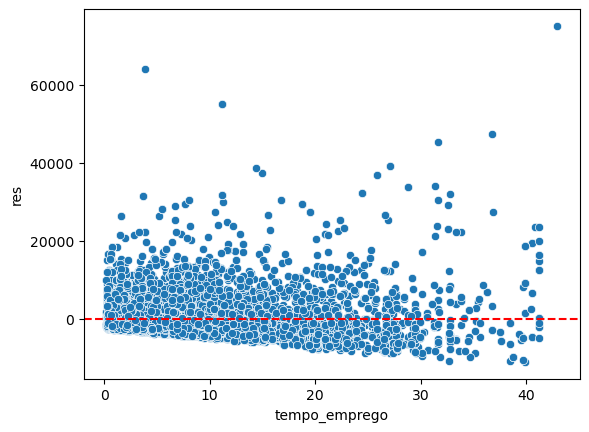

In [80]:
renda_prev['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = renda_prev)
plt.axhline(y=0, color='r', linestyle='--')

Para melhorar esse modelo linear, iria tentar ajustar com alguma função. Vou fazer um teste abaixo e medir o $R^2$

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2478.
Date:                Mon, 03 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:00:15   Log-Likelihood:            -1.2241e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12464   BIC:                         2.448e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

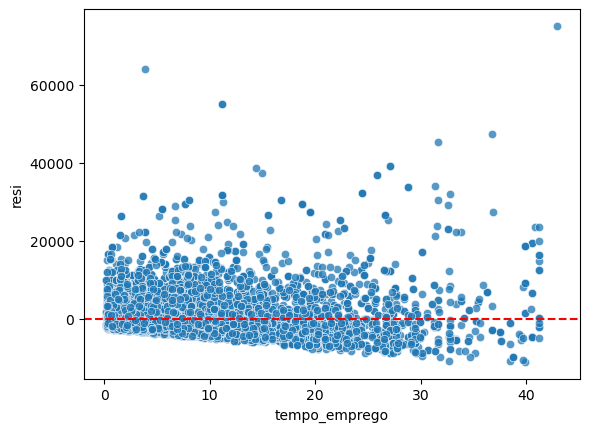

In [81]:
#aumentou um pouco o Rˆ2 usando polinômio de 2 grau
#testei outras, mas não ajudou muito

y8, X8 = patsy.dmatrices('renda ~ np.power(tempo_emprego,2) + 1', renda_prev)

modelo = sm.OLS(y8,X8).fit()

print(modelo.summary())

renda_prev['resi'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'resi', data = renda_prev, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [114]:
y, X = patsy.dmatrices('renda ~ qtd_filhos + tipo_renda + educacao +'
       'estado_civil + tipo_residencia + idade + tempo_emprego +'
       'qt_pessoas_residencia + 1', renda_prev)

modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     121.9
Date:                Mon, 03 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:29:24   Log-Likelihood:            -1.2238e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12444   BIC:                         2.450e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         2545.9760   1724.321      1.477      0.140    -833.960    5925.912
tipo_renda[T.Bolsista]           -1422.1762   2223.000     -0.640      0.522   -5779.600    2935.247
tipo_renda[T.Empresário]           946.3323     92.929     10.183      0.000     764.177    1128.487
tipo_renda[T.Pensionista]         1571.0486   1482.563      1.060      0.289   -1335.004    4477.101
tipo_renda[T.Servidor público]     225.4382    134.411      1.677      0.094     -38.029     488.905
educacao[T.Pós graduação]         1481.3879   1114.353      1.329      0.184    -702.917    3665.693
educacao[T.Secundário]            -581.2770    451.368     -1.288      0.198   -1466.028     303.474
educacao[T.Superior completo]      -68.1707    453.033     -0.150      0.880    -956.186     819.845
educacao[T.Superior incompleto]   -729.9188    485.379     -1.504      0.133   -1681.337     221.499
estado_civil[T.Separado]          -466.2927    831.318     -0.561      0.575   -2095.805    1163.219
estado_civil[T.Solteiro]             8.3794    816.227      0.010      0.992   -1591.552    1608.311
estado_civil[T.União]             -390.3164    147.479     -2.647      0.008    -679.398    -101.235
estado_civil[T.Viúvo]             -926.7694    853.443     -1.086      0.278   -2599.651     746.112
tipo_residencia[T.Casa]           -730.3933    338.649     -2.157      0.031   -1394.197     -66.590
tipo_residencia[T.Com os pais]   -1127.5204    379.141     -2.974      0.003   -1870.695    -384.346
tipo_residencia[T.Comunitário]    -769.2807    653.973     -1.176      0.239   -2051.169     512.608
tipo_residencia[T.Estúdio]        -483.2825    564.164     -0.857      0.392   -1589.131     622.566
tipo_residencia[T.Governamental] -1468.7333    408.588     -3.595      0.000   -2269.629    -667.838
qtd_filhos                          45.7363    814.306      0.056      0.955   -1550.430    1641.903
idade                               21.2078      4.934      4.298      0.000      11.536      30.880
tempo_emprego                      280.7761      6.295     44.605      0.000     268.437     293.115
qt_pessoas_residencia               85.0399    812.775      0.105      0.917   -1508.125    1678.205
==============================================================================
Omnibus:                     9898.687   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           379903.573
Skew:                           3.523   Prob(JB):                         0.00
Kurtosis:                      29.111   Cond. No.                     2.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is corre

In [132]:
y, X = patsy.dmatrices('renda ~ np.power(tempo_emprego,2) + posse_de_veiculo + posse_de_imovel +' 
                       'tipo_renda + sexo + idade + estado_civil + 1', renda_prev)

modelo1 = sm.OLS(y,X).fit()

modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     281.6
Date:                Mon, 03 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:47:16   Log-Likelihood:            -1.2194e+05
No. Observations:               12466   AIC:                         2.439e+05
Df Residuals:                   12452   BIC:                         2.440e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1425.0853    198.084      7.194      0.000    1036.811    1813.360
posse_de_veiculo[T.True]           3.4973     83.836      0.042      0.967    -160.834     167.828
posse_de_imovel[T.True]          385.9718     81.006      4.765      0.000     227.188     544.756
tipo_renda[T.Bolsista]           406.9757   2144.786      0.190      0.850   -3797.135    4611.087
tipo_renda[T.Empresário]        1064.4436     89.325     11.916      0.000     889.352    1239.535
tipo_renda[T.Pensionista]       2162.6602   1430.177      1.512      0.131    -640.708    4966.029
tipo_renda[T.Servidor público]   640.6028    128.672      4.979      0.000     388.386     892.820
sexo[T.M]                       2326.9110     87.128     26.707      0.000    2156.126    2497.696
estado_civil[T.Separado]        -255.7995    169.460     -1.509      0.131    -587.967      76.368
estado_civil[T.Solteiro]        -181.9077    120.352     -1.511      0.131    -417.815      54.000
estado_civil[T.União]           -141.6219    142.562     -0.993      0.321    -421.064     137.821
estado_civil[T.Viúvo]           -314.8836    249.623     -1.261      0.207    -804.183     174.416
np.power(tempo_emprego, 2)        10.5701      0.208     50.783      0.000      10.162      10.978
idade                             22.6036      4.475      5.051      0.000      13.832      31.375
==============================================================================
Omnibus:                     9678.179   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           359032.887
Skew:                           3.412   Prob(JB):                         0.00
Kurtosis:                      28.390   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
renda_prev.isna().sum()
renda_prev = renda_prev.dropna()

/var/folders/z2/zc4h5d491c53jbts0kckp8s00000gn/T/ipykernel_90549/3295679911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda_prev['resis'] = modelo1.resid


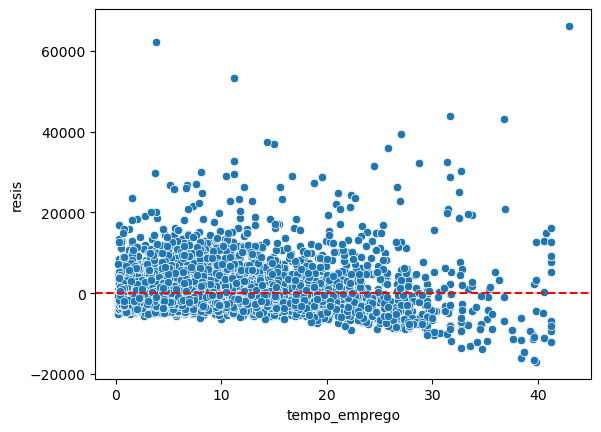

In [138]:
renda_prev['resis'] = modelo1.resid

sns.scatterplot(x = 'tempo_emprego', y = 'resis', data = renda_prev)
plt.axhline(y=0, color='r', linestyle='--')

/var/folders/z2/zc4h5d491c53jbts0kckp8s00000gn/T/ipykernel_90549/85353201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda_prev['resis'] = modelo1.resid


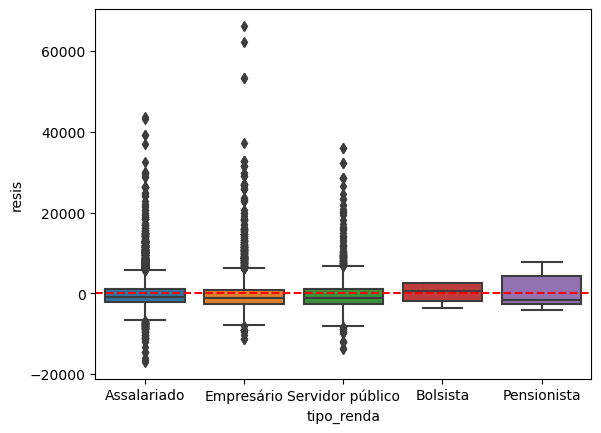

In [140]:
renda_prev['resis'] = modelo1.resid

sns.boxplot(x = 'tipo_renda', y = 'resis', data = renda_prev)
plt.axhline(y=0, color='r', linestyle='--')

Esse último modelo pareceu um pouco melhor que os outros, pelo $Rˆ2$ e pelo reísiduo, mas é uma melhora modesta.